# Sistema de Equações Lineares

## Algoritmo do Método de Eliminação de Gauss

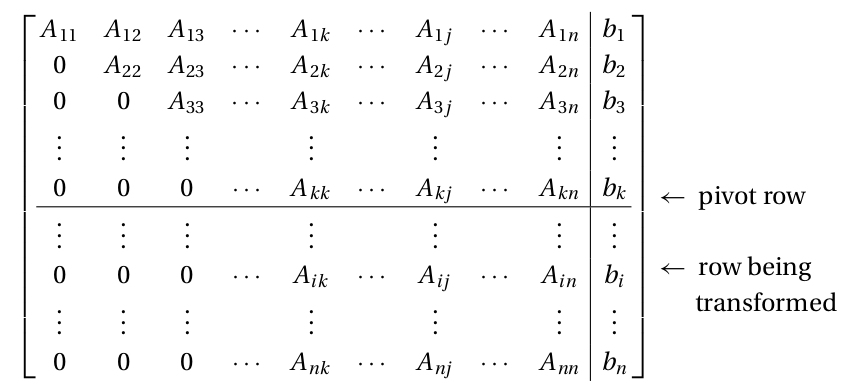

In [6]:
import numpy as np

In [7]:
def gaussElimin(a, b):
    n = len(b)
  # Elimination Phase
    for k in range(0, n-1):
        for i in range(k+1, n):
           if a[i, k] != 0.0:
               lam = a[i, k]/a[k, k]
               a[i, k+1:n] = a[i, k+1:n] - lam*a[k, k+1:n]
               b[i] = b[i] - lam*b[k]
  # Back substitution
    for k in range(n-1, -1, -1):
        b[k] = (b[k] - np.dot(a[k, k+1:n], b[k+1:n]))/a[k, k]
    return b

In [8]:
z = np.array([[2.0, 3.0, -1.0],
             [4.0, 4.0, -3.0],
             [2.0, -3.0, 1.0]])

k = np.array([[5.0, 3.0, -1.0]])

In [9]:
x = gaussElimin(z, k[0])

In [10]:
print('x = \n', x)

x = 
 [1. 2. 3.]
